In [275]:
# Make needed imports
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [276]:
# Load train and testing data
training_data = pd.read_pickle("../data/train.pkl")
testing_data = pd.read_pickle("../data/test.pkl")

In [277]:
training_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.353333,0.373961,0.040000,0.000000,0.003878,0.618557,0.003743,0.220000,0.040952,0.568421,0.544387,0.610526,0.000000,0.005346,0.000253,0.642066,0.619217,0.508547,0.351515,0.768400
1,0.353333,0.369806,0.041250,0.000000,0.003861,0.639175,0.003271,0.213333,0.042381,0.610526,0.540719,0.631579,0.000000,0.005513,0.024525,0.649446,0.626335,0.502137,0.345455,0.592494
2,0.337778,0.379501,0.044375,0.000000,0.000374,0.680412,0.022923,0.201333,0.046190,0.673684,0.521643,0.673684,0.000000,0.000541,0.002302,0.667897,0.644128,0.485043,0.321212,0.630311
3,0.328889,0.385042,0.046250,0.000000,0.004202,0.659794,0.015132,0.194667,0.048571,0.652632,0.619222,0.652632,0.000000,0.004827,0.002228,0.675277,0.651246,0.478632,0.303030,0.418208
4,0.324444,0.387812,0.048125,0.000000,0.002994,0.628866,0.021766,0.188000,0.050476,0.621053,0.635363,0.621053,0.000000,0.003887,0.000220,0.682657,0.661922,0.463675,0.284848,0.820511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,0.006667,1.000000,0.016875,0.251445,0.000000,0.680412,0.000236,0.333333,0.020000,0.663158,0.467351,0.642105,0.663366,0.003961,0.009875,0.343173,0.330961,0.434829,0.303030,0.588091
1301,0.011111,0.988920,0.016250,0.234104,0.000000,0.051546,0.007593,0.328000,0.019524,0.031579,0.422597,0.673684,0.724752,0.003952,0.009764,0.357934,0.348754,0.446581,0.321212,0.510390
1302,0.017778,0.099723,0.015625,0.255491,0.000000,0.731959,0.002313,0.322667,0.019048,0.726316,0.423331,0.705263,0.786139,0.000487,0.000097,0.040590,0.042705,0.456197,0.351515,0.456825
1303,0.028889,0.948753,0.015625,0.098844,0.000000,0.762887,0.004025,0.317333,0.018571,0.757895,0.396185,0.747368,0.831683,0.004785,0.009558,0.055351,0.056940,0.456197,0.339394,0.831598


In [278]:
testing_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.441860,0.375358,0.044286,0.000000,0.004170,0.649485,0.009290,0.232022,0.043684,0.031250,0.666667,0.649485,0.000000,0.004855,0.028598,0.633333,0.616487,0.519523,0.358974,0.200920
1,0.313953,0.388252,0.049286,0.000000,0.004575,0.670103,0.022436,0.211669,0.048947,0.666667,0.699012,0.670103,0.000000,0.005574,0.003134,0.659259,0.641577,0.502169,0.339744,0.552834
2,0.281395,0.409742,0.057143,0.001120,0.001503,0.639175,0.012872,0.185889,0.057895,0.635417,0.681941,0.639175,0.000000,0.003086,0.002314,0.692593,0.673835,0.469631,0.269231,0.763411
3,0.267442,0.421203,0.058571,0.000560,0.000625,0.628866,0.009185,0.179104,0.059474,0.625000,0.538185,0.628866,0.000000,0.003056,0.022563,0.700000,0.681004,0.450108,0.250000,0.554998
4,0.262791,0.421203,0.060000,0.001120,0.000992,0.639175,0.016020,0.172320,0.061053,0.572917,0.601078,0.577320,0.000000,0.002240,0.002195,0.707407,0.688172,0.439262,0.230769,0.654322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0.306977,0.498567,0.020714,0.144457,0.011548,0.783505,0.007213,0.267300,0.022632,0.041667,0.374663,0.783505,0.112936,0.014511,0.012461,0.237037,0.222222,0.600868,0.500000,0.374290
340,0.283721,0.522923,0.020714,0.143337,0.010733,0.814433,0.106538,0.260516,0.023158,0.833333,0.316262,0.814433,0.127310,0.013753,0.012092,0.240741,0.225806,0.588937,0.480769,0.325180
341,0.279070,0.752149,0.023571,0.125420,0.000093,0.814433,0.003695,0.227951,0.027368,0.833333,0.482480,0.814433,0.324435,0.000063,0.010497,0.255556,0.243728,0.519523,0.410256,0.634602
342,0.093023,0.839542,0.021429,0.259239,0.000045,0.731959,0.006867,0.366350,0.023684,0.687500,0.495957,0.731959,0.369610,0.000505,0.001171,0.274074,0.261649,0.454447,0.346154,0.479199


In [279]:
# Seperate training X and Y values
train_X = training_data.iloc[:, 2:20].values
train_Y = training_data.iloc[:, 1].values
train_Y

array([0.37396122, 0.36980609, 0.37950139, ..., 0.09972299, 0.94875346,
       0.91966759])

In [280]:
# we do not include the year column
train_X

array([[4.00000000e-02, 0.00000000e+00, 3.87755023e-03, ...,
        5.08547009e-01, 3.51515152e-01, 7.68400194e-01],
       [4.12500000e-02, 0.00000000e+00, 3.86149974e-03, ...,
        5.02136752e-01, 3.45454545e-01, 5.92493555e-01],
       [4.43750000e-02, 0.00000000e+00, 3.74293456e-04, ...,
        4.85042735e-01, 3.21212121e-01, 6.30310819e-01],
       ...,
       [1.56250000e-02, 2.55491329e-01, 0.00000000e+00, ...,
        4.56196581e-01, 3.51515152e-01, 4.56825484e-01],
       [1.56250000e-02, 9.88439306e-02, 0.00000000e+00, ...,
        4.56196581e-01, 3.39393939e-01, 8.31597725e-01],
       [1.50000000e-02, 9.65317919e-02, 0.00000000e+00, ...,
        4.63675214e-01, 3.39393939e-01, 3.18852773e-01]])

In [281]:
# Load testing values
test_X = testing_data.iloc[:, 2:20].values
test_Y = testing_data.iloc[:, 1].values
test_Y

array([0.37535817, 0.38825215, 0.40974212, 0.42120344, 0.42120344,
       0.        , 0.0243553 , 0.02005731, 0.15902579, 0.16475645,
       0.1747851 , 0.17908309, 0.01862464, 0.51575931, 0.17191977,
       0.17908309, 0.18051576, 0.19484241, 0.1747851 , 0.20057307,
       0.20200573, 0.10315186, 0.10888252, 0.1747851 , 0.23065903,
       0.21919771, 0.20916905, 0.21489971, 0.36103152, 0.10744986,
       0.1260745 , 0.14040115, 0.26504298, 0.25787966, 0.2722063 ,
       0.36962751, 0.40401146, 0.40544413, 0.40687679, 0.31232092,
       0.33094556, 0.38968481, 0.46418338, 0.56160458, 0.93266476,
       1.        , 0.02292264, 0.26074499, 0.2234957 , 0.22922636,
       0.02148997, 0.23209169, 0.39255014, 0.0487106 , 0.52722063,
       0.18338109, 0.52005731, 0.05157593, 0.00429799, 0.09598854,
       0.11031519, 0.62464183, 0.64756447, 0.51719198, 0.52005731,
       0.56303725, 0.11747851, 0.12893983, 0.13180516, 0.14040115,
       0.01432665, 0.16332378, 0.20487106, 0.23782235, 0.35100

In [282]:
test_X

array([[4.42857143e-02, 0.00000000e+00, 4.16977468e-03, ...,
        5.19522777e-01, 3.58974359e-01, 2.00919979e-01],
       [4.92857143e-02, 0.00000000e+00, 4.57525326e-03, ...,
        5.02169197e-01, 3.39743590e-01, 5.52834106e-01],
       [5.71428571e-02, 1.11982083e-03, 1.50328270e-03, ...,
        4.69631236e-01, 2.69230769e-01, 7.63410942e-01],
       ...,
       [2.35714286e-02, 1.25419933e-01, 9.30427532e-05, ...,
        5.19522777e-01, 4.10256410e-01, 6.34602020e-01],
       [2.14285714e-02, 2.59238522e-01, 4.48885086e-05, ...,
        4.54446855e-01, 3.46153846e-01, 4.79198899e-01],
       [2.14285714e-02, 1.98768197e-01, 1.20786209e-03, ...,
        4.56616052e-01, 3.33333333e-01, 4.98022847e-01]])

In [283]:
#basline estimate
#getting life_expectancy from the oroginal testing data
baseline_preds = testing_data.iloc[:, 1:2].values
# print(baseline_preds)
# Baseline errors, and display average baseline error
base_errors = abs(baseline_preds - test_Y)
print('Average baseline error: ', round(np.mean(base_errors), 2))

Average baseline error:  0.19


In [284]:
#Training Model using RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, max_leaf_nodes = 300, bootstrap = True)
# Fit the regressor with x and y data
regressor.fit(train_X, train_Y)
# Predict with testing X
predict_Y = regressor.predict(test_X)
print(predict_Y)

[0.31774993 0.31824757 0.36222099 0.37005222 0.36667875 0.13515107
 0.11851769 0.1197974  0.11261626 0.12697157 0.11269439 0.12531834
 0.1795968  0.47728053 0.10796912 0.10805163 0.13967447 0.13623108
 0.12902195 0.13867692 0.16199968 0.08062939 0.08222501 0.15533903
 0.18959783 0.19224822 0.1797902  0.17640435 0.16090215 0.08215308
 0.09466068 0.05677647 0.16132633 0.16173363 0.21298719 0.36473027
 0.38979617 0.38606959 0.28471472 0.25080687 0.32407885 0.30771524
 0.28862089 0.42569386 0.70478842 0.50215916 0.20912676 0.22490618
 0.182392   0.15606387 0.18842567 0.14962017 0.3136485  0.39325502
 0.41445544 0.20060686 0.4663537  0.49458128 0.48531158 0.07302541
 0.08006812 0.50834751 0.43410309 0.30291153 0.43065545 0.47250534
 0.08706757 0.14764448 0.13882095 0.12649975 0.10834507 0.0910194
 0.13844711 0.17737699 0.28341728 0.34547174 0.12634978 0.13310661
 0.12529654 0.08969669 0.09030357 0.22768426 0.14663699 0.14012791
 0.15863918 0.19342422 0.21474244 0.21768749 0.20368654 0.34761

In [285]:
# making prediction on the test set, we will get the prediction life expectancy
predict_Y = regressor.predict(test_X)
# Calculate the absolute errors
errors = abs(predict_Y - test_Y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.08 degrees.


In [286]:
#Determine Performance Metrics
# Calculate mean absolute percentage error
percentage_error = 100 * (errors / predict_Y)
# Calculate and display accuracy
accuracy = 100 - np.mean(percentage_error)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 59.48 %.


In [287]:
#figuring out the usefulness of all the variable in the entire random forest
# Get numerical feature importances
testing_data_without_year = testing_data.drop(testing_data.columns[[0]],axis = 1)
# print(testing_data_without_year)
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(testing_data_without_year, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable:                   11 Importance: 0.49
Variable:                   16 Importance: 0.09
Variable:                    2 Importance: 0.04
Variable:                    9 Importance: 0.04
Variable:                   15 Importance: 0.04
Variable:                    3 Importance: 0.03
Variable:                    6 Importance: 0.03
Variable:                   12 Importance: 0.03
Variable:                   13 Importance: 0.03
Variable:                   14 Importance: 0.03
Variable:                   17 Importance: 0.03
Variable:                    4 Importance: 0.02
Variable:                    5 Importance: 0.02
Variable:                    8 Importance: 0.02
Variable:                   10 Importance: 0.02
Variable:                   18 Importance: 0.02
Variable:                    1 Importance: 0.01
Variable:                    7 Importance: 0.01


In [288]:
#picking up the most important variables to recalculate the importance
updated_testing = testing_data.iloc[:, [2,6,9,11,12,13,14,15,13,16,17]]
test_important = testing_data.iloc[:, [2,6,9,11,12,13,14,15,13,16,17]].values
train_important = training_data.iloc[:, [2,6,9,11,12,13,14,15,13,16,17]].values

In [289]:
# Get numerical feature importances
updated_importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(updated_testing, updated_importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable:                   17 Importance: 0.49
Variable:                    6 Importance: 0.04
Variable:                   13 Importance: 0.04
Variable:                    9 Importance: 0.03
Variable:                   13 Importance: 0.03
Variable:                   11 Importance: 0.02
Variable:                   12 Importance: 0.02
Variable:                   15 Importance: 0.02
Variable:                   16 Importance: 0.02
Variable:                    2 Importance: 0.01
Variable:                   14 Importance: 0.01


In [290]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators = 300, max_leaf_nodes = 300, bootstrap = True)
# Train the random forest
rf_most_important.fit(train_important, train_Y)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_Y)
# Display the performance metrics
print('Mean Absolute Error:', np.mean(errors), 'degrees.')
updated_error_percentage = np.mean(100 * (errors / test_Y))
accuracy = 100 - updated_error_percentage
print('Accuracy:', accuracy, '%.')

Mean Absolute Error: 0.08141372280159816 degrees.
Accuracy: -inf %.


C:\Users\xu842\AppData\Local\Temp\ipykernel_64432\2633863536.py:10: RuntimeWarning: divide by zero encountered in true_divide
  updated_error_percentage = np.mean(100 * (errors / test_Y))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


ValueError: The number of FixedLocator locations (18), usually from a call to set_ticks, does not match the number of ticklabels (20).

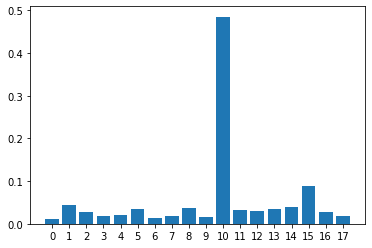

In [291]:
import matplotlib.pyplot as plt

x_value = list(range(len(importances)))
print(x_value)

plt.bar(x_value, importances, orientation = 'vertical')
plt.xticks(x_value, testing_data, rotation = 6)

plt.ylabel('importance');
plt.xlable('Variable');
plt.title('Variable Importance');
plt.show()

In [292]:
errors = mean_squared_error(test_Y, predict_Y)
print("MSE loss on testing set: " + str(mean_squared_error(test_Y, predict_Y)))
print("Random forest regressor score: " + str(regressor.score(test_X, test_Y)))

MSE loss on testing set: 0.015083745129231064
Random forest regressor score: 0.5012044611063322
